# Salaries of Presidents and Vice Presidents of the United States

- A simple line plot to visualize the salaries collected in the pvp_dataset, a comparison with inflation adjusted values, and ranking of Presidents and Vice Presidents.
- Inflation data was downloaded from [officialdata.org](https://www.officialdata.org/us/inflation/1789?amount=100). Note that data prior 1913 should be considered approximations.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')

In [3]:
pvp = pd.read_csv('pvp_dataset.csv')
idf = pd.read_csv('inflation_dataset.csv')

- Filter Ps & VPs, adjust inflation multipier and calculate inflation adjusted salary.

In [4]:
idf['multiplier'] = idf.loc[idf['year']==2020, 'amount'].values[0]/idf.amount
pvp['inflation_adjusted_salary'] = (pvp.join(idf.set_index('year')['multiplier'], on='year')['multiplier']*pvp.salary).round(2)

pres = pvp[pvp.position_title=='PRESIDENT OF THE UNITED STATES']
vp = pvp[pvp.position_title=='VICE PRESIDENT OF THE UNITED STATES']

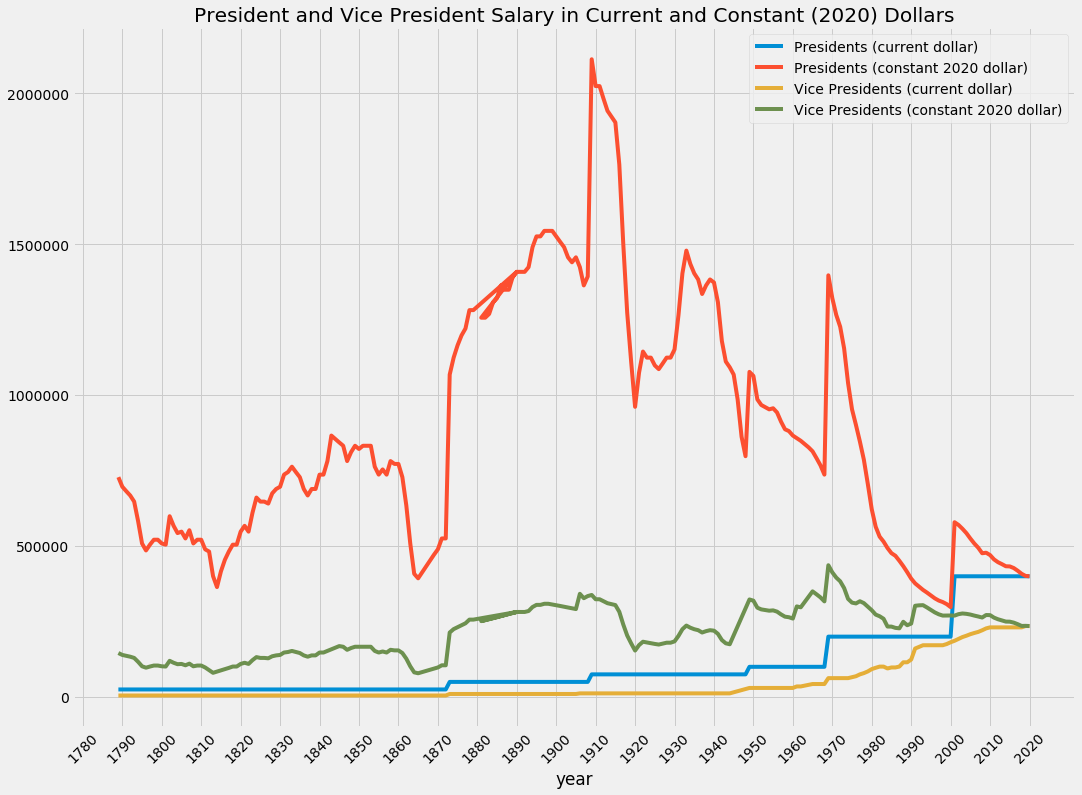

In [9]:
fig, ax = plt.subplots(figsize=(16,12))
ax = pres.plot.line(x='year', y='salary', rot=45, ax=ax)
ax = pres.plot.line(x='year', y='inflation_adjusted_salary', rot=45, ax=ax)
ax = vp.plot.line(x='year', y='salary', rot=45, ax=ax)
ax = vp.plot.line(x='year', y='inflation_adjusted_salary', rot=45, ax=ax)
ax.set(xticks=range(1790, 2030, 10), title='President and Vice President Salary in Current and Constant (2020) Dollars')
ax.legend(['Presidents (current dollar)','Presidents (constant 2020 dollar)','Vice Presidents (current dollar)','Vice Presidents (constant 2020 dollar)'])
plt.show()

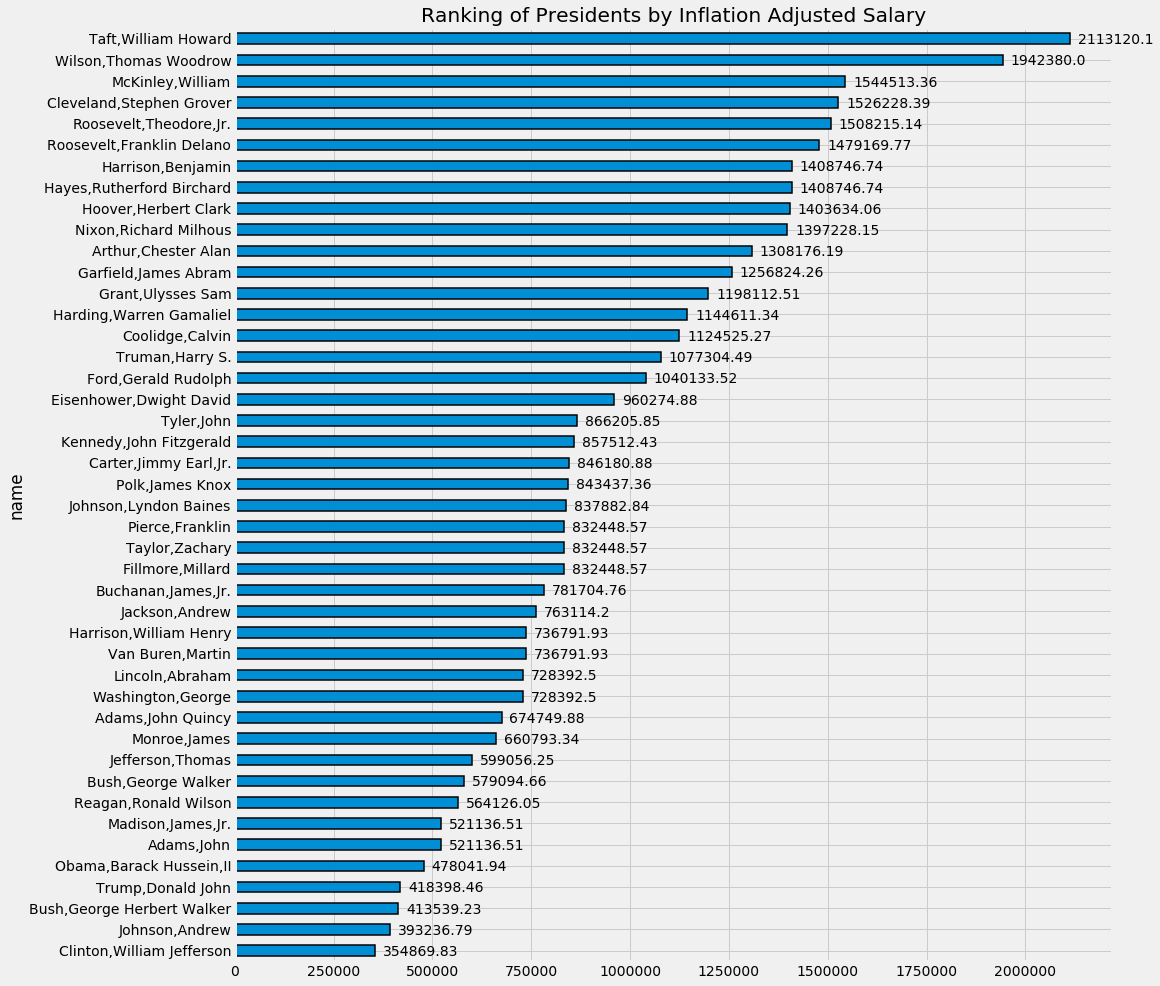

In [6]:
max_salary = pres.groupby('name').inflation_adjusted_salary.max().sort_values()
ax = max_salary.plot.barh(figsize=(14,16), edgecolor='black', linewidth=1.5)

for i in ax.patches:
    ax.text(i.get_width()+20000, i.get_y(), str(round((i.get_width()), 2)))

ax.set_title('Ranking of Presidents by Inflation Adjusted Salary')
plt.show()

- Presidents in the 10s, 30s, and beginning of 70s seem to be extremely rich.

# History:
- Version 1: Initial commit.
- Version 2: TBD

